# Data Exploration


### Imports

In [4]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

from data_exploration import plot_correlation_matrix_heat_map

 - plot_correlation_matrix_heat_map(df,label,qty_fields=10)
 
 This function takes a dataframe, a variable label (to find correlations against) and a top number of correlations to display. It then prints a seaborn heatmap of the correlations.
 
 For example, if you wished to find the top ten variables correlated with the target variable, you would pass the target name as 'label' and receive a heatmap from the function.

### Data
Read in the analytic data set from your data_cleaning notebook.

In [13]:
import pandas as pd

# Define the file path
file_path = '/Users/jennifercasias/Desktop/Voyatek Training/kaggle-18/notebooks/jc_analytic_set.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    print(df.head())  # Display the first few rows to verify
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path.")

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...    id_32      id_33           id_34  \
0  342.0  150.0    discover  142.0  ...  Unknown    Unknown         Unknown   
1  404.0  150.0  mastercard  102.0  ...  Unknown    Unknown         Unknown   
2  490.0  150.0        visa  166.0  ...  Unknown    Unknown         Unknown   
3  567.0  150.0  mastercard  117.0  ...  Unknown    Unknown         Unknown   
4  514.0  150.0  mastercard  102.0  ...     32.0  2220x1080  match_status:2   

     id_35    id_36    id_37    id_38  card2_missing  card3_mi

### Exploratory Analysis
Now that we have the data in the correct shape, do the following for all variables, but pay special attention to the target variable. Note that some datasets may be very large, and conventional data exploration methods may be inconvenient. You might want to utilize plotting inside a for loop (hint: you can use the input() function to pause the loop and wait for you to press enter). Or, you may want to save all plots as images so you can quickly glance over their thumbnails in a folder.

#### Statistical Description
Run the describe() function to create a table of summary stats. Note anything interesting, relevant, etc.

<b>Summary Statistics Interpretation:</b>
- <b>Count</b>: Number of non-null values in each column. This tells you how complete your data is.
- <b>Mean</b>: Average value of the data in each column. It gives you a central tendency measure.
- <b>Std (Standard Deviation)</b>: Measure of the amount of variation or dispersion in the dataset. A higher standard deviation indicates more spread out data.
- <b>Min</b>: Minimum value observed in each column. It gives you the smallest value present in the dataset.
- <b>25%, 50% (Median), 75%</b>: Percentiles of the data. The median (50th percentile) is the value below which 50% of the data falls. Quartiles -(25th and 75th percentiles) divide the data into quarters.
- <b>Max</b>: Maximum value observed in each column. It gives you the largest value present in the dataset.

In [14]:
# Display summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean     9898.734658     362.165125     153.194925     199.254892   
std      4901.170153     156.729103      11.321413      41.117611   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

<b>Key Observations:</b> 
- `TransactionID`: Unique identifier for transactions.
- `isFraud`: Target variable with a mean of approximately 0.035, indicating a low fraud rate (3.5%).
- `TransactionDT`: Timestamps of transactions with a wide range and standard deviation, suggesting a significant variation in transaction times.
- `TransactionAmt`: Transaction amounts vary widely with a mean of approximately 135.03 and a large standard deviation.
- `card1`, `card2`, `card3`, `card5`: Details about cards used in transactions, each with varying means and standard deviations.
- `V334` to `V339`: These columns have varying means and standard deviations, indicating potential variability in their values.

#### Correlation
Make a heatmap to visualize the correlation between pairs of variables and consider the following:
- Are a large percentage of variables highly correlated?
- If so, how will this affect model training in future steps?
- If correlation is a concern, how could you deal with it before training models?

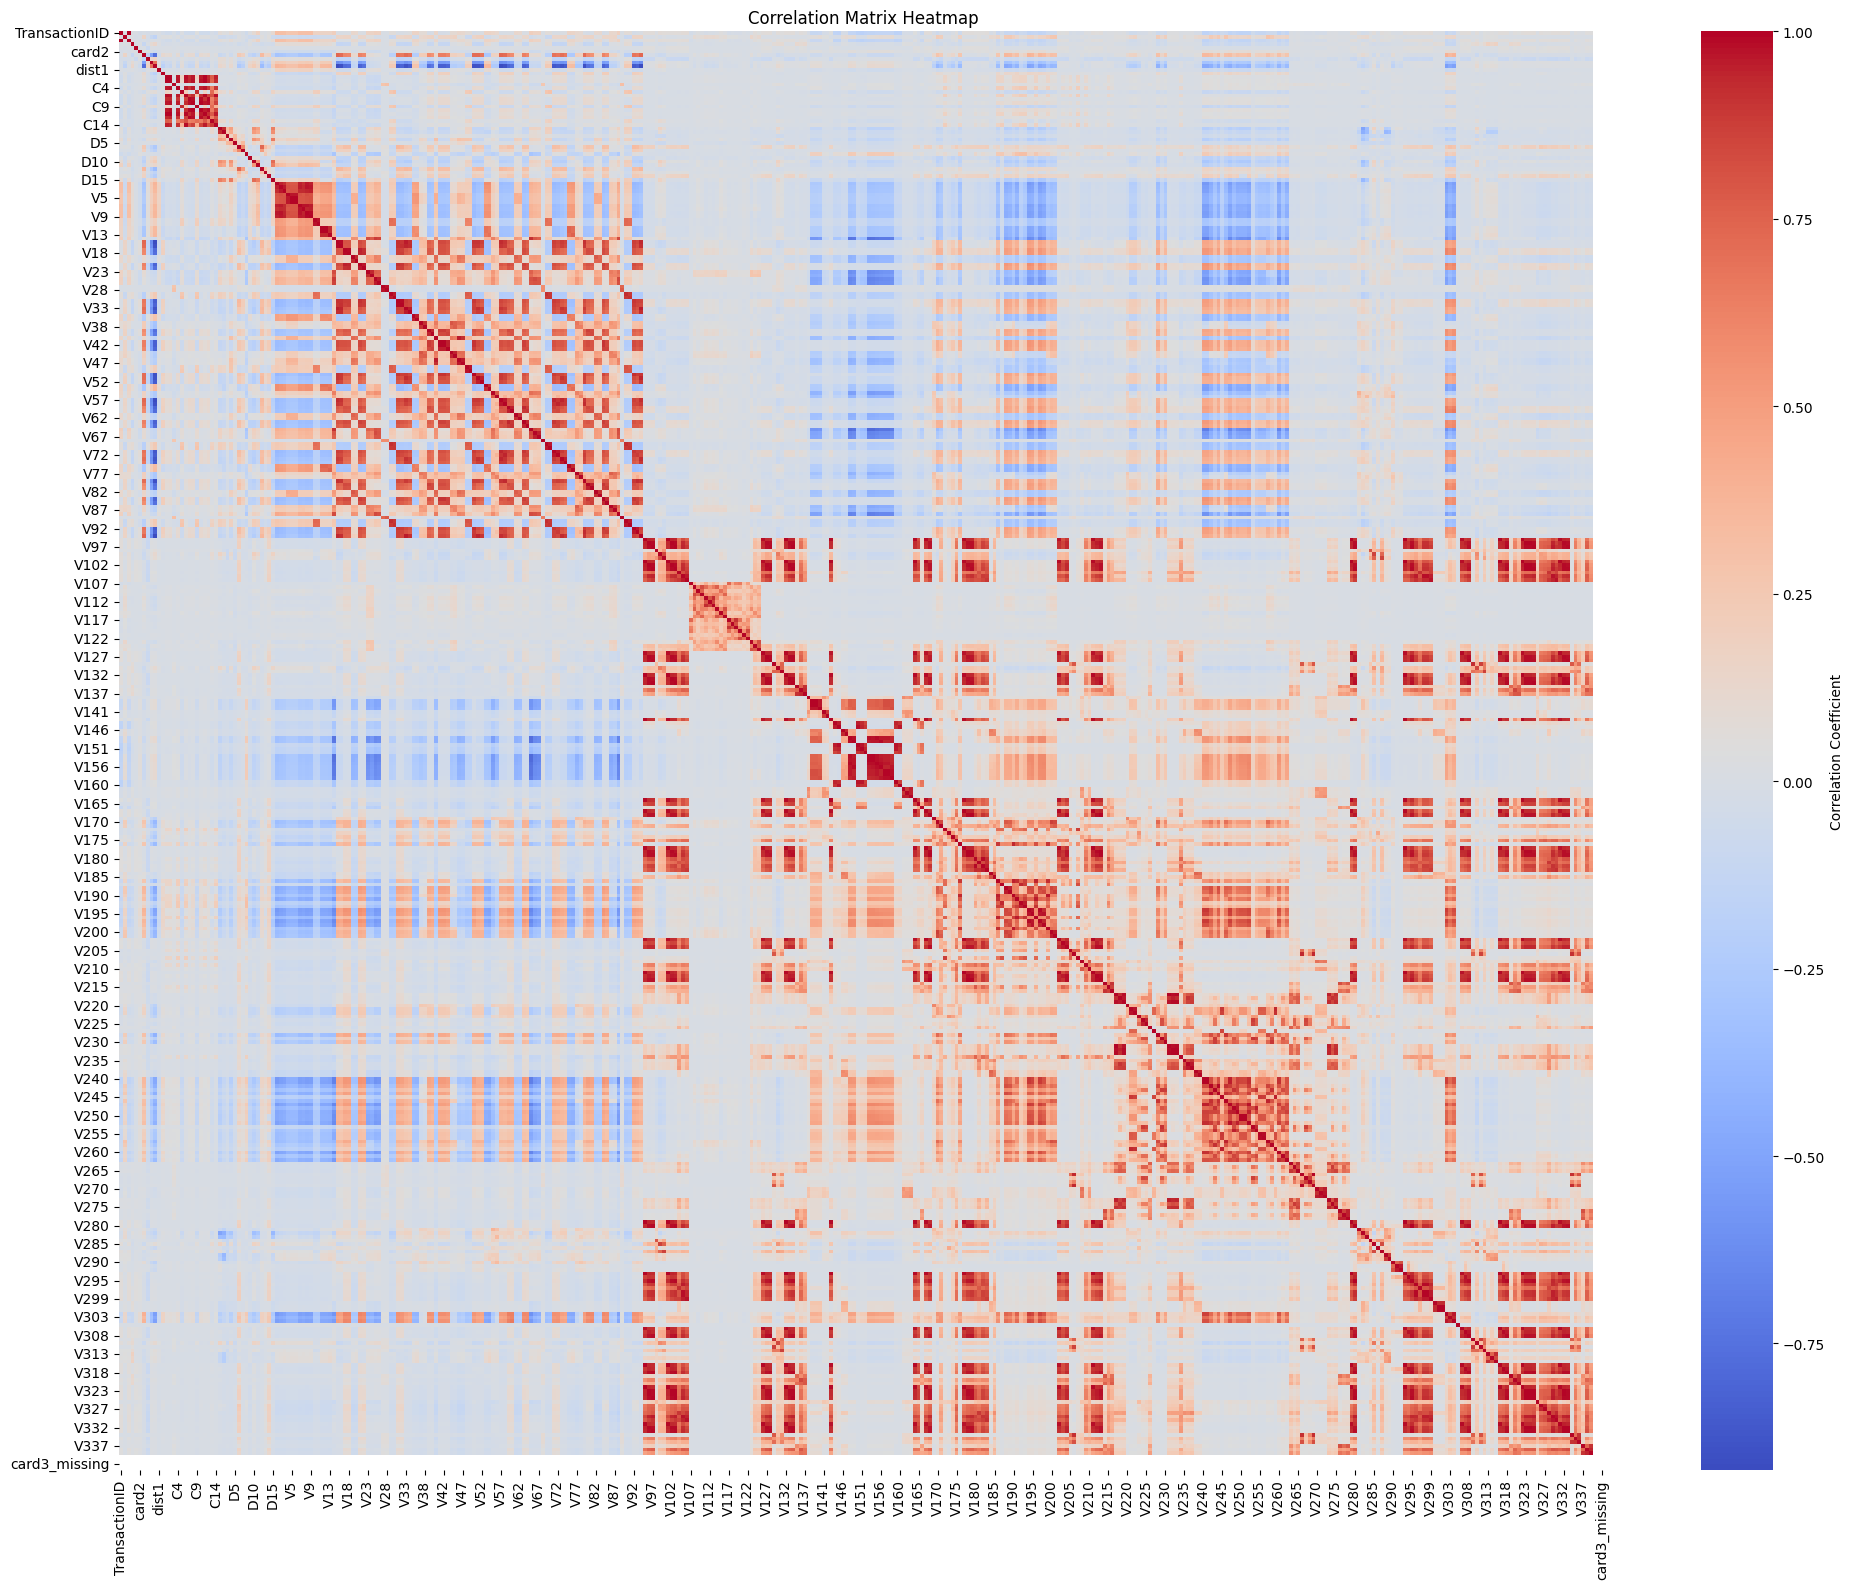

In [17]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlations between numeric features
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

# Add title
plt.title('Correlation Matrix Heatmap')


# Display the plot
plt.tight_layout()
plt.show()

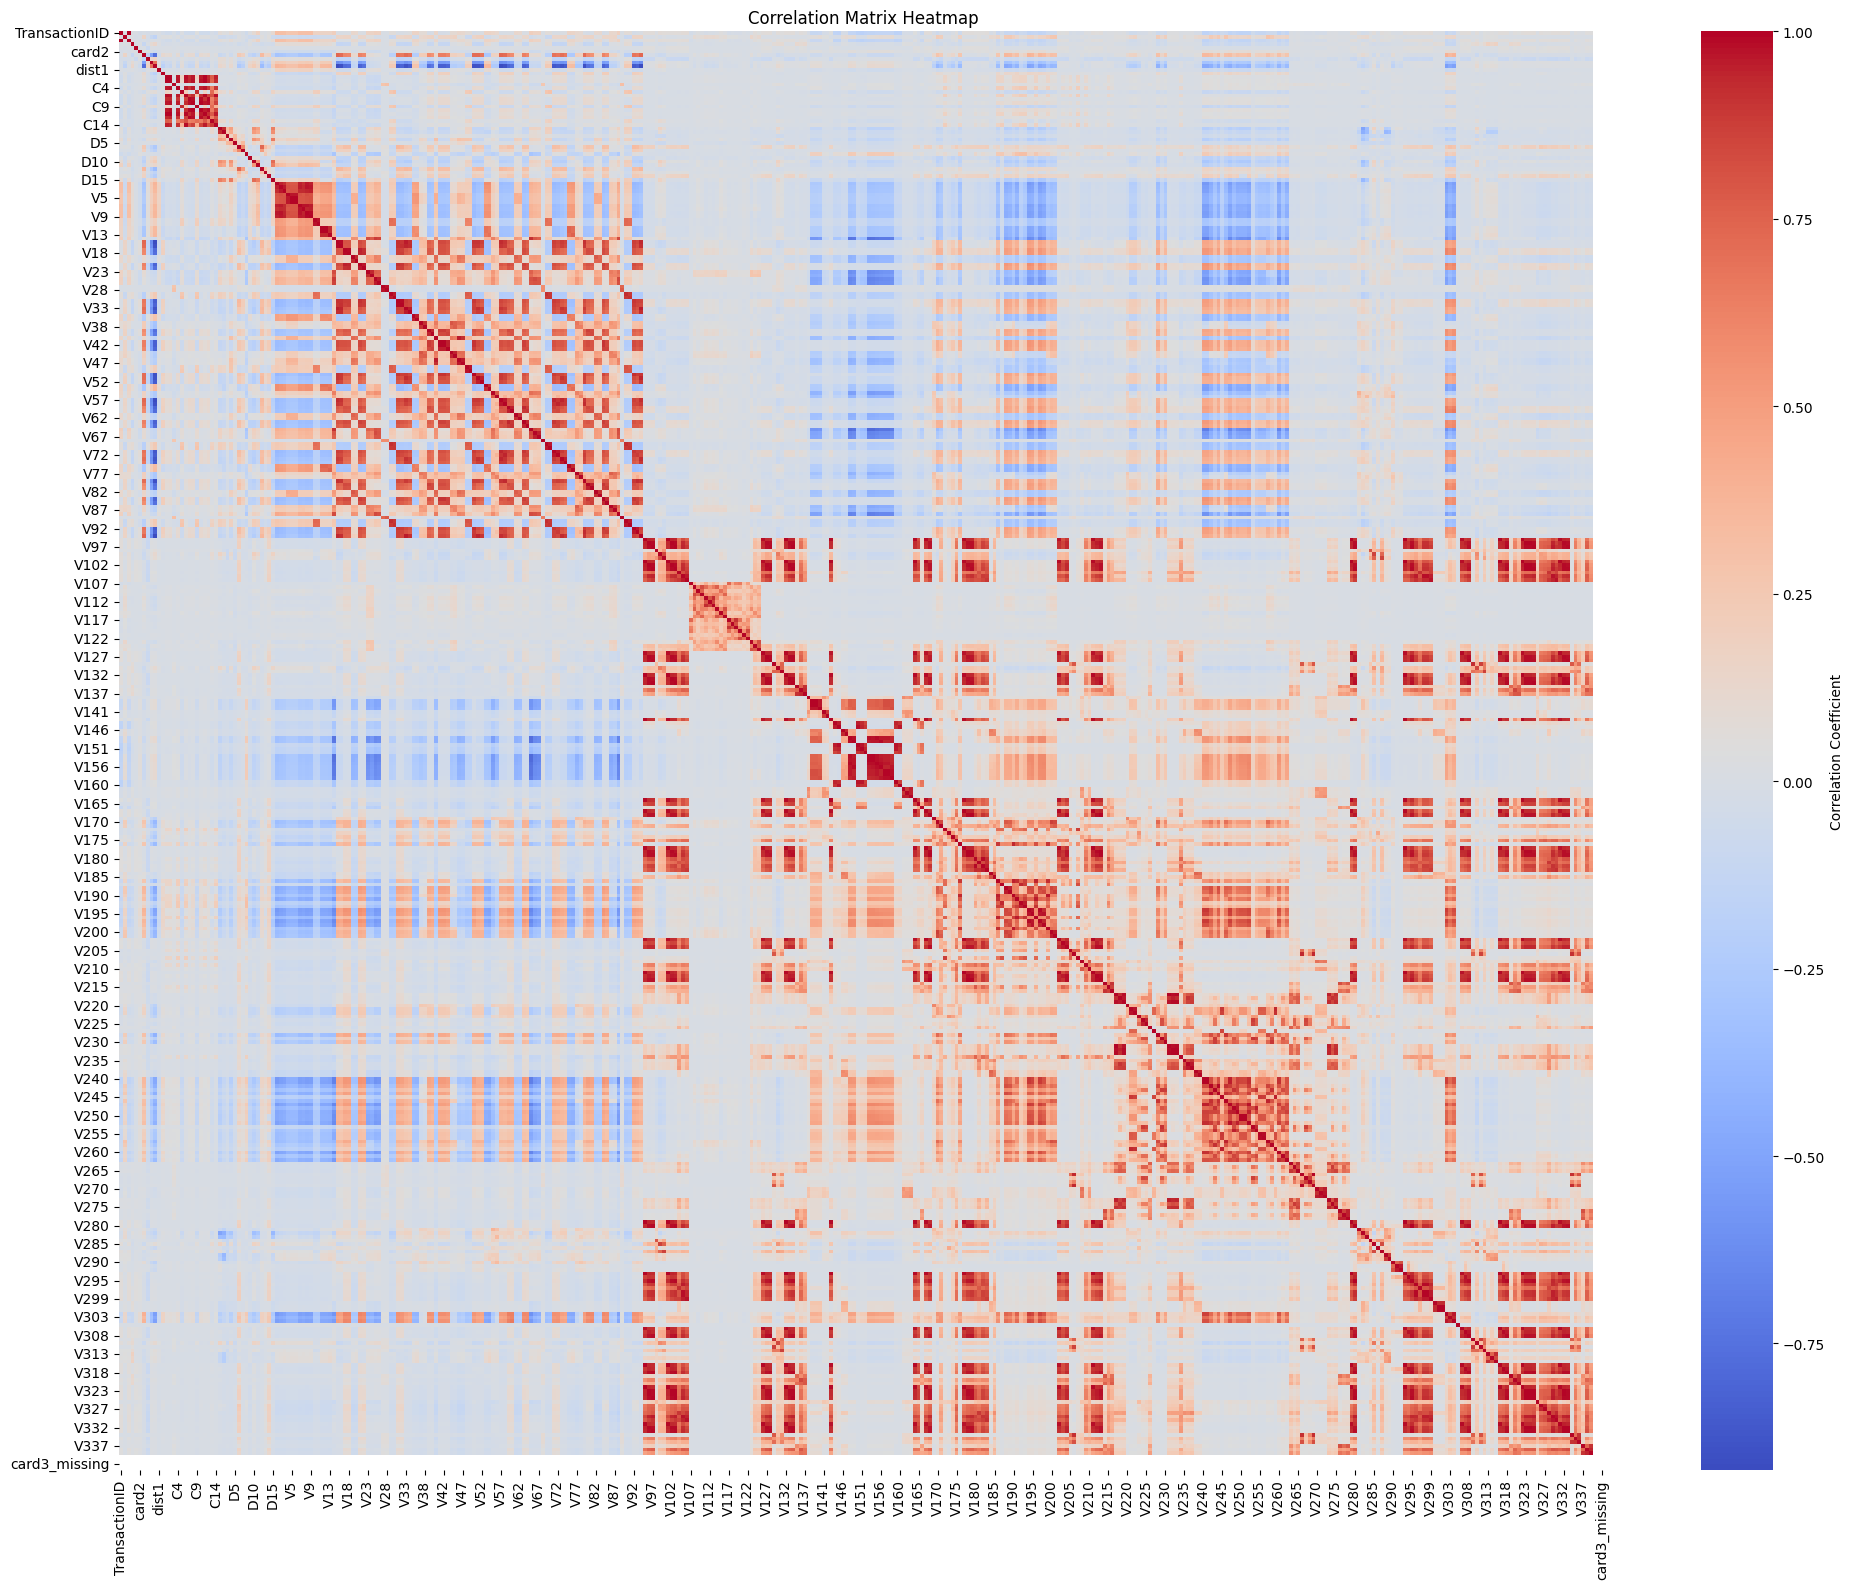

In [17]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlations between numeric features
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

# Add title
plt.title('Correlation Matrix Heatmap')


# Display the plot
plt.tight_layout()
plt.show()

#### Variance
Look at the variance for each variable and consider the following:
- Do any variables have very low variance (and how do you define "low")?
- Should you keep these variables in the set for model training?

#### Outliers
##### Boxplot
Produce boxplots to visualize outliers for each variable. Take note of the following:
- The spread of each variable.
- The presence or absence of outliers.
- If outliers are present: Are they significant and how could you deal with them before training models?

##### Z_scores
Consider a statistical test for outliers (if necessary), such as looking at variables Z_scores. Ask yourself:
- If the data has a large number of outliers, is the default Z_score function reliable?
- What is a "large" Z_score for this data?
- What, if anything, should you do with the outliers?

#### Distributions
Plot histograms for each of the variables. 
- What do the different features' distributions look like? 
- How is the target variable distributed?
- If variables are not normally distributed, how does that affect model training?

### Additional Understanding
The above exploratory analysis is only a fraction of the possible methods available to inspect your data. It may be the case that over the course of this exploration, you've found other questions about the data you want to answer. Do so here.

## Outcome
At this point you should have a good understanding of the data and some strong ideas for how you want to approach modeling and the sort of issues you expect to face while you do so.